In [383]:
# unsupervised algorithms
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

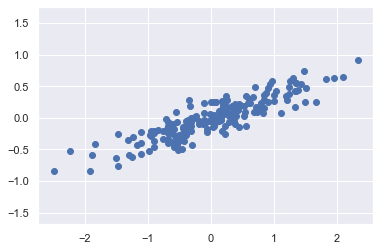

In [384]:
rng = np.random.RandomState(1) # 0-1 even distribution
# rand uniform distribution, randn normal distributon (can be less than 0)
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T # dot product, .T is transpose of the array
plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal');

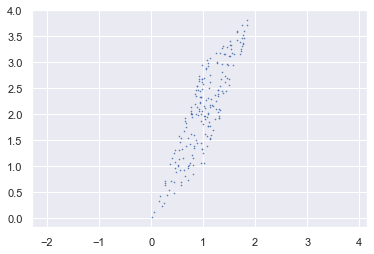

In [385]:
# example: add two even distribution can not get even distribution
rng = np.random.RandomState(1)
t = rng.rand(2, 200).T # dot product, .T is transpose of the array
new = t[:, 0] + t[:, 1]
#y = np.zeros(len(X[:, 0]))
y = 1 * t[:, 0] + 3* t[:, 1]
plt.scatter(new, y, s=0.3)
plt.axis('equal');

In [386]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)

PCA(n_components=2)

In [387]:
print(pca.components_)

[[-0.94446029 -0.32862557]
 [-0.32862557  0.94446029]]


In [388]:
print(pca.explained_variance_)

[0.7625315 0.0184779]


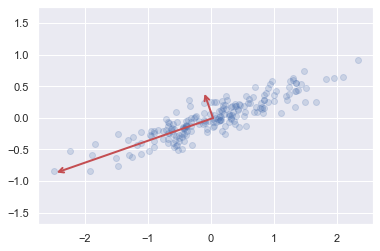

In [389]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0, color = 'r')
    ax.annotate('', v1, v0, arrowprops=arrowprops)

# plot data
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
plt.axis('equal');
# principal axes of the data, and the length of the vector is an indication of how "important" that axis is in describing the distribution of the data

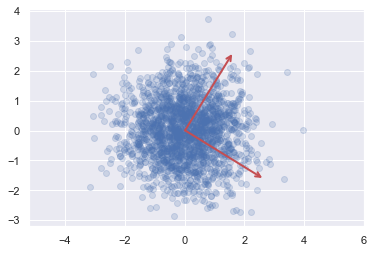

In [390]:
# normal distribution
z =rng.randn(2, 2000).T
pca = PCA(n_components=2)
pca.fit(z)
plt.scatter(z[:, 0], z[:, 1], alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
plt.axis('equal');

In [391]:
# dimension reductoin

pca = PCA(n_components=1)
pca.fit(X)
X_pca = pca.transform(X)
print("original shape:   ", X.shape)
print("transformed shape:", X_pca.shape)

original shape:    (200, 2)
transformed shape: (200, 1)


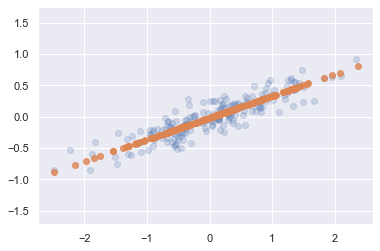

In [392]:
X_new = pca.inverse_transform(X_pca)
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.8)
plt.axis('equal');
# the information along the least important principal axis or axes is removed, leaving only the component(s) of the data with the highest variance

In [393]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

In [394]:
pca = PCA(2)  # project from 64 to 2 dimensions
projected = pca.fit_transform(digits.data)
print(digits.data.shape)
print(projected.shape)
#  unsupervised manner—that is, without reference to the labels

(1797, 64)
(1797, 2)


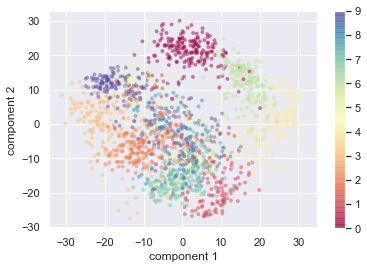

In [395]:
plt.scatter(projected[:, 0], projected[:, 1],
            c=digits.target, edgecolor='none', alpha=0.5, s = 15, cmap = 'Spectral')
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

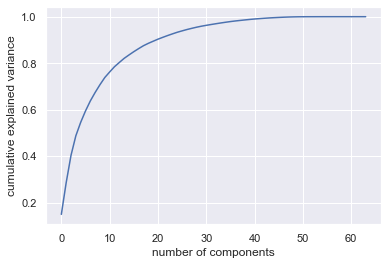

In [396]:
# choosing the number of components

pca = PCA().fit(digits.data)
plt.plot(np.cumsum(pca.explained_variance_ratio_)) # Return the cumulative sum of the elements along a given axis.
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

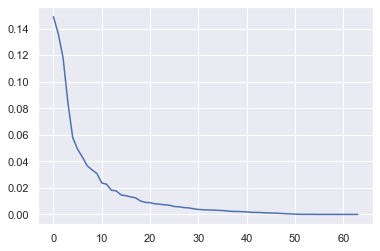

In [397]:
plt.plot(pca.explained_variance_ratio_)

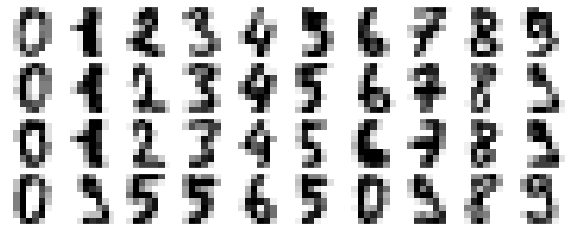

In [398]:
# noise filter
def plot_digits(data):
    fig, axes = plt.subplots(4, 10, figsize=(10, 4),
                             subplot_kw={'xticks':[], 'yticks':[]},
                             gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8, 8),
                  cmap='binary', interpolation='nearest',
                  clim=(0, 16))
plot_digits(digits.data)

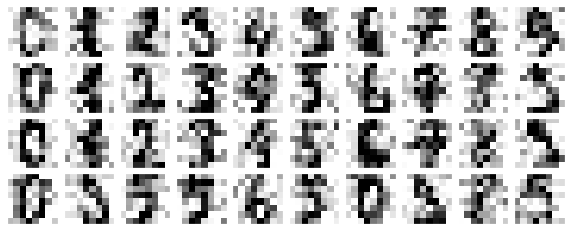

In [399]:
np.random.seed(42)
noisy = np.random.normal(digits.data, 4)
plot_digits(noisy)

In [400]:
pca = PCA(0.50).fit(noisy)
pca.n_components_

12

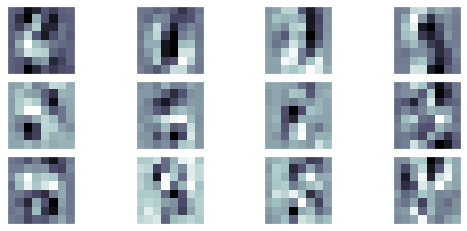

In [401]:
# plot the 12 components
fig, axes = plt.subplots(3, 4, figsize=(9, 4),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat): # 24 pictures
    # components_ have the shape of (n_components, n_features), which is (150, 2914)
    ax.imshow(pca.components_[i].reshape(8, 8), cmap='bone')

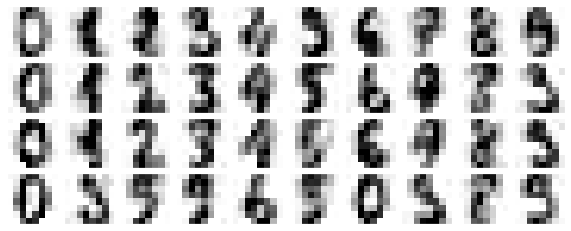

In [402]:
components = pca.transform(noisy) # pca.transform gives the shape of (n_samples, n_components), whcih is (1797, 12)
filtered = pca.inverse_transform(components)
plot_digits(filtered)
#  train the classifier on the lower-dimensional representation, which will automatically serve to filter out random noise in the inputs.

In [403]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


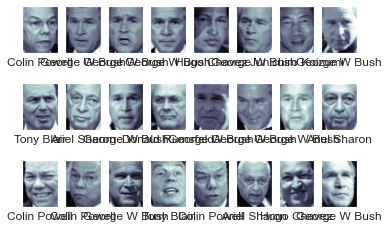

In [404]:
fig, ax = plt.subplots(3, 8)
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='bone')
    axi.set(xticks=[], yticks=[],
            xlabel=faces.target_names[faces.target[i]])

In [405]:
from sklearn.decomposition import PCA as RandomizedPCA
pca = RandomizedPCA(150)
pca.fit(faces.data)

PCA(n_components=150)

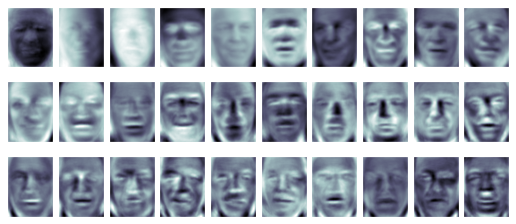

In [406]:
fig, axes = plt.subplots(3, 10, figsize=(9, 4),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat): # 24 pictures
    # components_ have the shape of (n_components, n_features), which is (150, 2914)
    ax.imshow(pca.components_[i].reshape(62, 47), cmap='bone') # (62, 47) is shape of image
# these components are technically known as "eigenvectors," so these types of images are often called "eigenfaces"
# the first few eigenfaces (from the top left) seem to be associated with the angle of lighting on the face, and later principal vectors seem to be picking out certain features, such as eyes, noses, and lips.

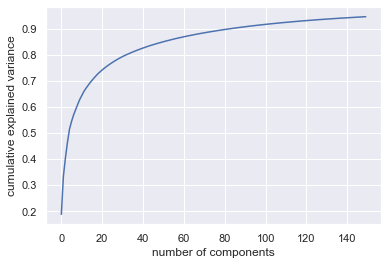

In [407]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [408]:
# Compute the components and projected faces
pca = RandomizedPCA(150).fit(faces.data)
components = pca.transform(faces.data)
projected = pca.inverse_transform(components)

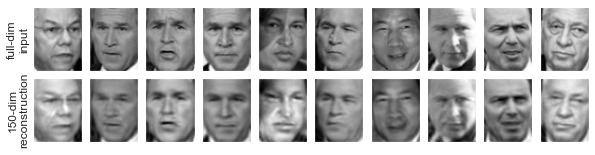

In [409]:
# Plot the results
fig, ax = plt.subplots(2, 10, figsize=(10, 2.5),
                       subplot_kw={'xticks':[], 'yticks':[]},
                       gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i in range(10):
    ax[0, i].imshow(faces.data[i].reshape(62, 47), cmap='binary_r')
    ax[1, i].imshow(projected[i].reshape(62, 47), cmap='binary_r')
    
ax[0, 0].set_ylabel('full-dim\ninput')
ax[1, 0].set_ylabel('150-dim\nreconstruction');